# Куча

## Доступные операции Кучи

- Insert($p$) - добавляет новый элемент с приоритетом $p$
- Remove($it$) - удаляет элемент, на который указывает итератор $it$
- GetMin() - возвращает элемент с минимальным приоритетом
- ExtractMin() - извлекает из очереди элемент с минимальным приоритетом
- ChangePriority($it$, $p$) - изменят приоритет элемента, на который указывает итератор $it$, на $p$

## Двоичная (мин-) куча

Это двоичное дерево, в котором выполняются следующие свойства:

- значение вершины $\leq$ значений ее детей

- минимальное значение хранится в корне, поэтому GetMin() работает за $O(1)$

## Вставка и просеивание вверх

- Подвесим новый элемент листом в произвольное место
- Начнем чинить свойство кучи, просеивая проблемную вершину вверх

## Время работы операции вставки

- Важный инвариант: в каждый момент времени свойство кучи нарушено не более чем в одной вершине
- При просеивании вверх эта вершина становится ближе к корню
- Время работы есть $O(h)$, где $h$ - высота кучи

## Извлечение минимума и просеивание вниз

- Заменим корень на любой лист
- Обменяем проблемную вершину с меньшим из ее детей, чтобы быть уверенными, что продолжать чинить кучу нужно только в одном из поддеревьев
- Время работы: $O(h)$

## Изменение приоритета

- Изменим приоритет и дадим элементу просеиться вниз или вверх

## Удаление

- Изменим приоритет элемента на $-\infty$, просеим его вверх и извлечем

# Полное двоичное дерево

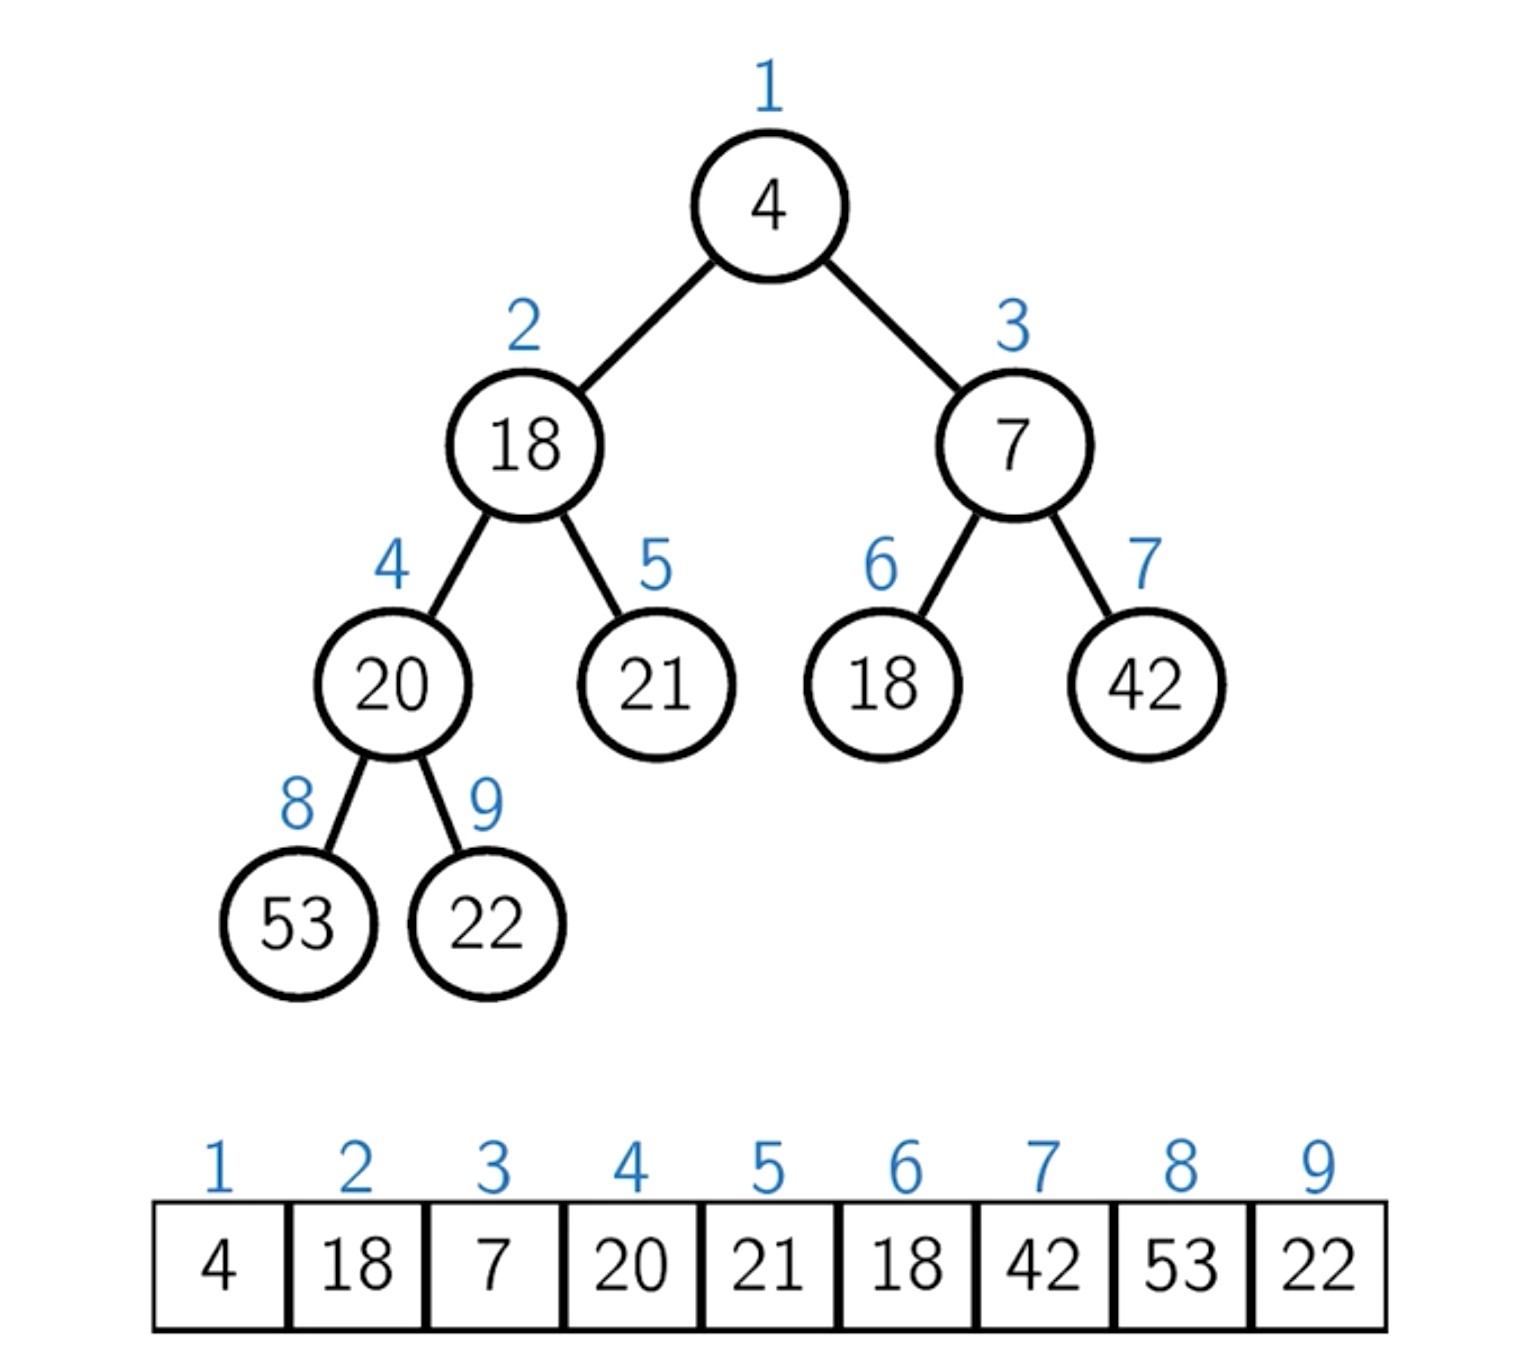

- Каждый уровень заполняем слева направо
- Все уровни заполнены полностью, кроме, возможно, последнего
- Для хранения не нужны указатели, можно хранить просто в массиве
- Естественная нумерация, сверху внил, слева на право
- При добавлении элемента подвешиваем лист на последний уровень; при удалении отрезаем самый последний лист
- Удобно ходить по дереву: если в вершине индекс $i$, тогда дети имеют индексы $2\cdot i$, $2\cdot i + 1$, а родитель имеет индекс $\lfloor \frac{i}{2}\rfloor$
- Глубина кучи есть $O(\log n)$, поэтому все операции работают за $O(\log n)$

# Задача

Первая строка входа содержит число операций $1 \leq n \leq 10^5$. Каждая из последующих $n$ строк задают операцию одного из следующих двух типов:

- Insert($x$), где $0 \leq x \leq 10^9$ — целое число;
- ExtractMax.
Первая операция добавляет число $x$ в очередь с приоритетами, вторая — извлекает максимальное число и выводит его.

In [12]:
n = int(input())
def swift_up(lst, i):
    if i == 0:
        return
    if lst[i] > lst[(i - 1) // 2]:
        lst[(i - 1) // 2], lst[i] = lst[i], lst[(i - 1) // 2]
        swift_up(lst, (i - 1) // 2)
    
    
def swift_down(lst, i):
    child1, child2 = float('inf'), float('inf')
    
    if 2*i + 1 >= len(lst) and 2*i + 2 >= len(lst):
        return
    
    if 2*i + 1 < len(lst):
        child1 = lst[2*i + 1]
        
    if 2*i + 2 < len(lst):
        child2 = lst[2*i + 2]
        
    if lst[i] < child1 or (lst[i] < child2 and child2 != float('inf')):
        if child1 > child2 or child2 == float('inf'):
            lst[i], lst[2*i + 1] = lst[2*i + 1], lst[i]
            swift_down(lst, 2*i + 1)
        else:
            lst[i], lst[2*i + 2] = lst[2*i + 2], lst[i]
            swift_down(lst, 2*i + 2)
    
lst = []
while n > 0:
    raw = input().split()
    if raw[0] == 'Insert':
        lst.append(int(raw[1]))
        swift_up(lst, len(lst) - 1)       
    else:
        print(lst[0])
        lst[0] = lst[-1]
        lst.pop()
        swift_down(lst, 0)
    n -= 1

3
Insert 5
ExtractMax
5
Insert 5
